<a href="https://colab.research.google.com/github/lux-gw/STAT-6289---Deep-Learning/blob/master/HW5_Luxenberg_Sam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Install Magnitude on Google Colab
! echo "Installing Magnitude.... (please wait, can take a while)"
! (curl https://raw.githubusercontent.com/plasticityai/magnitude/master/install-colab.sh | /bin/bash 1>/dev/null 2>/dev/null)
! echo "Done installing Magnitude."

Installing Magnitude.... (please wait, can take a while)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   137  100   137    0     0    598      0 --:--:-- --:--:-- --:--:--   600
Done installing Magnitude.


In [5]:
from pymagnitude import *

In [7]:
!wget http://magnitude.plasticity.ai/word2vec/light/GoogleNews-vectors-negative300.magnitude

--2020-11-17 20:23:36--  http://magnitude.plasticity.ai/word2vec/light/GoogleNews-vectors-negative300.magnitude
Resolving magnitude.plasticity.ai (magnitude.plasticity.ai)... 52.217.68.227
Connecting to magnitude.plasticity.ai (magnitude.plasticity.ai)|52.217.68.227|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4211335168 (3.9G) [binary/octet-stream]
Saving to: ‘GoogleNews-vectors-negative300.magnitude’

GoogleNews-vectors- 100%[===================>]   3.92G  31.2MB/s    in 2m 5s   

2020-11-17 20:25:42 (32.0 MB/s) - ‘GoogleNews-vectors-negative300.magnitude’ saved [4211335168/4211335168]



In [8]:
file_path = "GoogleNews-vectors-negative300.magnitude"
vectors = Magnitude(file_path)

In [9]:
vectors.distance("cat", "dog")

0.69145405

# Question 1. 

What is the dimensionality of these word embeddings? Provide an integer. 

In [14]:
print("There are {} dimensions for these word embeddings".format(vectors.dim))

There are 300 dimensions for these word embeddings


# Question 2. 

What are the top 5 most similar words to picnic (not including picnic itself)? 

In [27]:
vectors.most_similar("picnic", topn=5)

[('picnics', 0.7400875),
 ('picnic_lunch', 0.7213739),
 ('Picnic', 0.700534),
 ('potluck_picnic', 0.6683274),
 ('picnic_supper', 0.65189123)]

In [30]:
# Similarly, we could find the top 5 most similar by querying the array embedding itself. 
# Note that we should exclude the first entry as it is the word "picnic" itself. 
vectors.most_similar(vectors.query("picnic"), topn=6)

[('picnic', 0.9999998),
 ('picnics', 0.7400875),
 ('picnic_lunch', 0.7213739),
 ('Picnic', 0.700534),
 ('potluck_picnic', 0.6683274),
 ('picnic_supper', 0.65189123)]

In [53]:
import matplotlib.pyplot as plt
sims = []
words = []
for i in range(10):
  _, x = vectors.most_similar("picnic", topn=10)[i]
  sims.append(x)
  words.append(_)

Text(0, 0.5, 'Similarity')

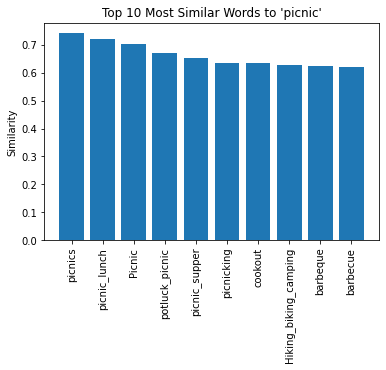

In [59]:
plt.bar(x=words, height=sims)
plt.xticks(rotation=90)
plt.title("Top 10 Most Similar Words to 'picnic'")
plt.ylabel("Similarity")

# Question 3.

According to the word embeddings, which of these words is not like the others? ['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette']

In [31]:
vectors.doesnt_match(['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette'])

'tissue'

The above function finds the word that is least like the other words. 

In [73]:
# Plot the first 2 (of 300) dimensions
def plot_2D(words):
  
  dim1 = []
  dim2 = []
  for word in words:
    dim1.append(vectors.query(word)[0])
    dim2.append(vectors.query(word)[1])

  plt.scatter(x=dim1, y=dim2)
  plt.title("First 2 Dimensions")

  for i in range(len(words)):
    plt.annotate(words[i],
                 (dim1[i],dim2[i]),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')


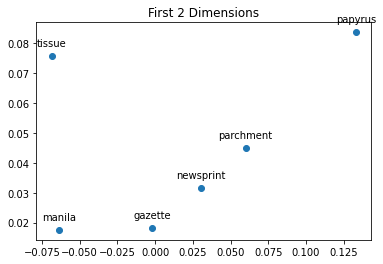

In [74]:
plot_2D(words=['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette'])

While the above plot may not truly be meaningful because it only depicts 2 of the 300 dimensions, it nontheless shows how that even in just these 2 dimensions, tissues is far from the other words. It would be more helpful if we used PCA or t-SNE to actually reduce the dimensions of all the words in the vocabular and then plot these words. 

# Question 4.

Solve the following analogy. Leg is to jump as X is to throw. 

In [37]:
vectors.most_similar(positive=['leg', 'throw'], negative=['jump'], topn=1)

[('forearm', 0.48294652)]

The analogy in the above goes: What is to a "throw" that a "leg" is to a "jump", i.e. leg + throw - jump = ?

In this case, according to these embeddings, the best word to complete this analogy is "forearm". 